In [ ]:
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
le=preprocessing.LabelEncoder()
x=d[["year","odometer"]].values
y=d["price"].values
print(y)
print(x)
reg = LinearRegression()
x = x.reshape((n,1))
reg = reg.fit(x , y)
y_pred = reg.predict(x)
rmse = np.sqrt(mean_squared_error(y ,y_pred))
r2 = r2_score(y , y_pred)
print(rmse)
print(r2)

[ 6995.  9495.   800. ... 14239.  3900. 12900.]
[[  2010. 200396.]
 [  2007. 152434.]
 [  2015.  90000.]
 ...
 [  2016. 112828.]
 [  2006. 160000.]
 [  1962.  62000.]]


  location  condition Listed_date Listed_time drive    fuel        lat  \
0   dallas  excellent  01-06-2022       18;17   4wd     gas  32.856174   
1   dallas  excellent  01-06-2022       18;16   fwd  hybrid  32.856174   
2   dallas  excellent  01-06-2022       18;16   fwd     gas  32.778500   
3   dallas        NaN  01-06-2022       18;16   fwd     gas  33.681077   
4   dallas  excellent  01-06-2022       18;16   rwd     gas  32.856174   

         long  odometer paint color  ...      size title status transmission  \
0  -96.672722  200396.0         NaN  ...       NaN        clean    automatic   
1  -96.672722  152434.0         NaN  ...       NaN        clean    automatic   
2  -97.083400   90000.0        blue  ...  mid-size        clean    automatic   
3 -112.058490   61482.0         NaN  ...       NaN        clean    automatic   
4  -96.672722   70523.0         NaN  ...  mid-size        clean    automatic   

    type                       year make model cylinders  year      make  

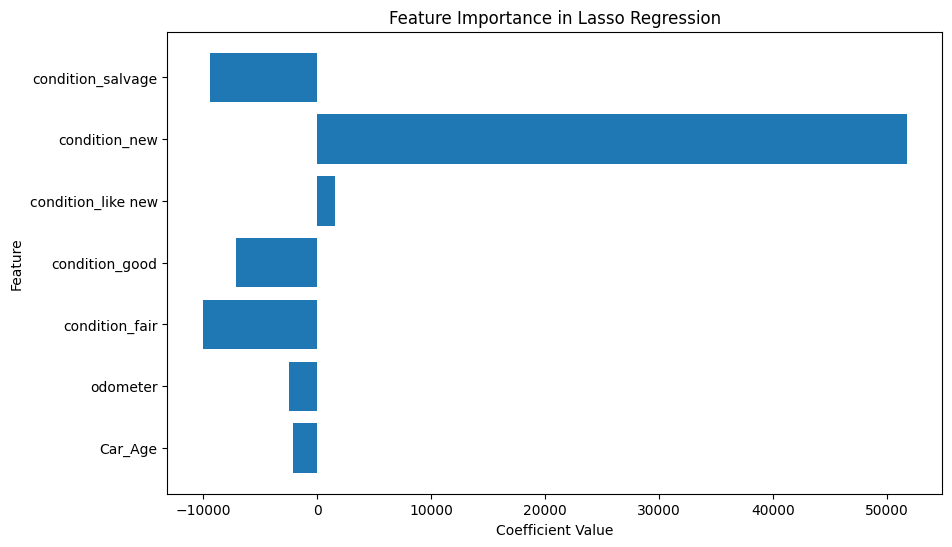

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Step 1: Load the dataset
data = pd.read_csv('/content/Craigslist Car Dataset.csv')

# Step 2: Data exploration
print(data.head())
print(data.info())
print(data.describe())

# Step 3: Handling missing values
data = data.dropna()  # Drop rows with missing values for simplicity

# Step 4: Feature Engineering
# Create a new feature 'Car_Age' based on the current year
data['Car_Age'] = 2024 - data['year']

# Drop irrelevant or less useful columns (like 'year', if we have 'Car_Age')
data = data.drop(columns=['year'])

# Step 5: Handle categorical variables using one-hot encoding
categorical_features = ['condition']
numeric_features = ['Car_Age', 'odometer']

# Use ColumnTransformer to handle different types of preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', StandardScaler(), numeric_features),
        ('categorical', OneHotEncoder(drop='first'), categorical_features)
    ])

# Step 6: Split the data into training and testing sets
X = data.drop(columns=['price'])
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 7: Linear Regression Model
linear_model = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', LinearRegression())])

linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Step 8: Ridge Regression Model
ridge_model = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', Ridge(alpha=1.0))])

ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Step 9: Lasso Regression Model
lasso_model = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', Lasso(alpha=0.1))])

lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Step 10: Model Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print(f"Mean Absolute Error: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"Mean Squared Error: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R^2 Score: {r2_score(y_true, y_pred):.2f}")
    print("\n")

# Evaluate all models
evaluate_model(y_test, y_pred_linear, 'Linear Regression')
evaluate_model(y_test, y_pred_ridge, 'Ridge Regression')
evaluate_model(y_test, y_pred_lasso, 'Lasso Regression')

# Optional: Visualizing the coefficients (importance) of features in Lasso Regression
lasso_coefficients = lasso_model.named_steps['regressor'].coef_
feature_names = preprocessor.named_transformers_['numerical'].get_feature_names_out().tolist() + \
                list(preprocessor.named_transformers_['categorical'].get_feature_names_out())

plt.figure(figsize=(10, 6))
plt.barh(feature_names, lasso_coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Lasso Regression')
plt.show()

In [ ]:
# import pandas as pd

# # Define function for outlier detection using IQR
# def detect_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Identify outliers
#     outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

#     return outliers, lower_bound, upper_bound

# # Detect outliers in Odometer and Price columns
# odometer_outliers, odo_lower, odo_upper = detect_outliers_iqr(data, 'odometer')
# price_outliers, price_lower, price_upper = detect_outliers_iqr(data, 'price')

# print(f"Odometer outliers: {len(odometer_outliers)}")
# print(f"Price outliers: {len(price_outliers)}")

# # Remove outliers
# df_cleaned = data[(data['odometer'] >= odo_lower) & (data['odometer'] <= odo_upper)]
# df_cleaned = df_cleaned[(df_cleaned['price'] >= price_lower) & (df_cleaned['price'] <=price_upper)]

Odometer outliers: 8
Price outliers: 44
